# Relationship review of CHAS v MEDV -

Infer: To the above jupyter notebook, add a section where you use inferential
statistics to analyse whether there is a significant difference in median house prices
between houses that are along the Charles river and those that aren’t. You should
explain and discuss your findings within the notebook. This part is also worth
20%.

In [40]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.utils import Bunch

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_selection import chi2
import scipy.stats 

import scipy.stats as stats

In [4]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MEDV,506.0,22.532806,9.197104,5.00000,17.025000,21.20000,25.000000,50.0000
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000


In [7]:
df['MEDV'] =boston['target']
medv = df['MEDV'].copy()
del df['MEDV']
df = pd.concat((medv, df), axis=1)

In [6]:
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])

In [10]:
MEDV = df[['MEDV']]
MEDV_mean = np.mean(df[['MEDV']])
print(MEDV_mean)

MEDV    22.532806
dtype: float64


In [16]:
isBound = df['CHAS']==1
print(isBound.head())

0    False
1    False
2    False
3    False
4    False
Name: CHAS, dtype: bool


In [17]:
BoundDF = df[isBound]
print(BoundDF.shape)

(35, 14)


In [21]:
print(BoundDF['MEDV'])

142    13.4
152    15.3
154    17.0
155    15.6
160    27.0
162    50.0
163    50.0
208    24.4
209    20.0
210    21.7
211    19.3
212    22.4
216    23.3
218    21.5
219    23.0
220    26.7
221    21.7
222    27.5
234    29.0
236    25.1
269    20.7
273    35.2
274    32.4
276    33.2
277    33.1
282    46.0
283    50.0
356    17.8
357    21.7
358    22.7
363    16.8
364    21.9
369    50.0
370    50.0
372    50.0
Name: MEDV, dtype: float64


In [22]:
boundMEDV = BoundDF['MEDV']

In [24]:
type(boundMEDV)

pandas.core.series.Series

In [25]:
## Store 2nd dataframe for non-bound MEDV values

notBound = df['CHAS']==0
notBoundDF = df[notBound]
print(notBoundDF.shape)

(471, 14)


In [26]:
print(notBoundDF['MEDV'])

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 471, dtype: float64


In [27]:
notBoundMEDV = notBoundDF['MEDV']

In [28]:
boundMEDV.describe()

count    35.000000
mean     28.440000
std      11.816643
min      13.400000
25%      21.100000
50%      23.300000
75%      33.150000
max      50.000000
Name: MEDV, dtype: float64

In [29]:
notBoundMEDV.describe()

count    471.000000
mean      22.093843
std        8.831362
min        5.000000
25%       16.600000
50%       20.900000
75%       24.800000
max       50.000000
Name: MEDV, dtype: float64

- The max median house value is 50 not dependent on whether the hosue bounds the Charles river or not

- However, the minimum when not bound, 5, is a lot lower than the minimum when the house does bound the Charles river, 13.

- The means are fairly similar at roughly 28.5 and 22, therefore it appears the CHAS variable does not have too much of an impact on the mean of the median house prices

In [31]:
notCount = notBoundMEDV.count()
count = boundMEDV.count()

In [47]:
# https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce
# Two sampled T-test

# Null hypothesis - no relationship between the two measured groups

from scipy.stats import ttest_ind

boundMean = boundMEDV.mean()
notBoundMean = notBoundMEDV.mean()

print("Bound MEDV mean value:",boundMean)
print("Not Bound MEDV mean value:",notBoundMean)

boundSTD = boundMEDV.std()
notBoundSTD = notBoundMEDV.std()

print("Bound MEDV std value:",boundSTD)
print("Not Bound MEDV std value:",notBoundSTD)

ttest,pval = ttest_ind(boundMEDV, notBoundMEDV)
print("p-value",pval)

if pval <0.05:
  print("\nWe reject null hypothesis")
else:
  print("\nWe accept null hypothesis")



Bound MEDV mean value: 28.44
Not Bound MEDV mean value: 22.093842887473482
Bound MEDV std value: 11.816643297634458
Not Bound MEDV std value: 8.831362409577903
p-value 7.390623170519905e-05

We reject null hypothesis


Rejecting the null hypothesis infers that there is a relationship between the two measured groups

Two sampled T-test :-The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test.
(https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce)

In [46]:
# ANOVA

t_test = stats.ttest_ind(boundMEDV, notBoundMEDV)
print(t_test)

if t_test.pvalue<0.05:
    print("\nReject null hypothesis")
else:
    print("\nAccept null hypothesis")

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

Reject null hypothesis


### Analysis :

Independent sample t-tests assume that there is a given difference between the means of 2 populations, usually 0.

We then ask, given the hypothesised difference (usually zero) what was the probability of seeing a t-statistic at least this extreme.

If it's too extreme (say, less that 5% chance of seeing it) then we say our hypothesis about the difference must be wrong.

https://nbviewer.jupyter.org/github/ianmcloughlin/jupyter-teaching-notebooks/blob/master/anova.ipynb

https://www.statisticallysignificantconsulting.com/Anova.htm

The null hypothesis for ANOVA is that the mean (average value of the dependent variable) is the same for all groups. The alternative or research hypothesis is that the average is not the same for all groups. The ANOVA test procedure produces an F-statistic, which is used to calculate the p-value.

### Result :
Reject null hypothesis = means are not the same for the groups

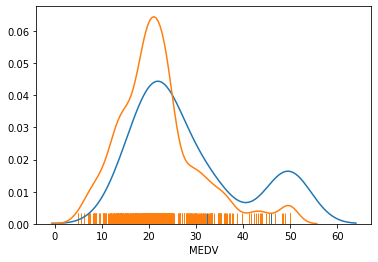

In [53]:
sns.distplot(boundMEDV, hist=False, rug=True)
sns.distplot(notBoundMEDV, hist=False, rug=True)

plt.show()

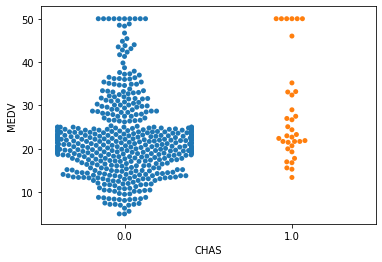

In [61]:
#bothCols = df[['CHAS', 'MEDV']]
#sns.swarmplot(x=bothCols[['CHAS']], y=bothCols[['MEDV']], data=bothCols)
sns.swarmplot(x="CHAS", y="MEDV", data=df)
plt.show()